# Experiments

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Normalization, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, InputLayer, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import shutil
import kagglehub

## Load Dataset

In [5]:
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
print("Path to dataset files:", path)

data = './../data/brain-tumor-mri-dataset'
shutil.copytree(path, data)

Path to dataset files: /Users/jasonevan/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


'./../data/brain-tumor-mri-dataset'

In [6]:
TRAIN_PATH = f'./../data/brain-tumor-mri-dataset/Training'
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=TRAIN_PATH,
    batch_size=64,
    image_size=(256, 256),
    validation_split=0.3,
    subset="both",
    seed=42,
    color_mode="grayscale"
)

Found 5712 files belonging to 4 classes.
Using 3999 files for training.
Using 1713 files for validation.


In [7]:
TEST_PATH = './../data/brain-tumor-mri-dataset/Testing'
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=TEST_PATH,
    batch_size=64,
    image_size=(256, 256),
    color_mode="grayscale",
    seed=42,
    shuffle=False,
)

Found 1311 files belonging to 4 classes.


## Modelling

### Take input shape

In [8]:
for images, labels in test_ds.take(1):
  input_shape = images.shape[1:]
  break

### Normalization Layer

In [ ]:
norm_layer = Normalization()
norm_layer.adapt(data=train_ds.map(lambda x, y: x))

### Sequential Model

In [ ]:
data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.1)
])

model = Sequential([
    InputLayer(input_shape),
    data_augmentation,
    norm_layer,
    Conv2D(32, 3, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2(0.0001)),
    MaxPooling2D(),
    Conv2D(64, 3, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2(0.0001)),
    MaxPooling2D(),
    Conv2D(64, 3, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2(0.0001)),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2(0.0001)),
    Dropout(0.2),
    Dense(64, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2(0.0001)),
    Dense(32, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2(0.0001)),
    Dense(len(train_ds.class_names), activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_2 (Normalization) │ (None, 256, 256, 1)    │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,439,143 (28.38 MB)

 Trainable params: 7,439,140 (28.38 MB)

 Non-trainable params: 3 (16.00 B)

In [ ]:
model.compile(
    optimizer=Adam(0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Give early stopping

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[early_stopping])

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.3956 - loss: 4.6310 - val_accuracy: 0.6836 - val_loss: 0.9045
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.6448 - loss: 0.9643 - val_accuracy: 0.6859 - val_loss: 0.8800
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.6997 - loss: 0.8608 - val_accuracy: 0.7799 - val_loss: 0.6982
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.7329 - loss: 0.7672 - val_accuracy: 0.7928 - val_loss: 0.6905
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.7570 - loss: 0.7305 - val_accuracy: 0.8103 - val_loss: 0.6118
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.7715 - loss: 0.6910 - val_accuracy: 0.8249 - val_loss: 0.5789
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.7761 - loss: 0.6582 - val_accuracy: 0.8050 - val_loss: 0.6130
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.8054 - loss: 0.5958 - val_accuracy: 

## Evaluation

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print(f'Loss: {loss}, Accuracy: {accuracy}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7333 - loss: 0.7177
Loss: 0.6031032800674438, Accuracy: 0.8054919838905334


## Plot History Train

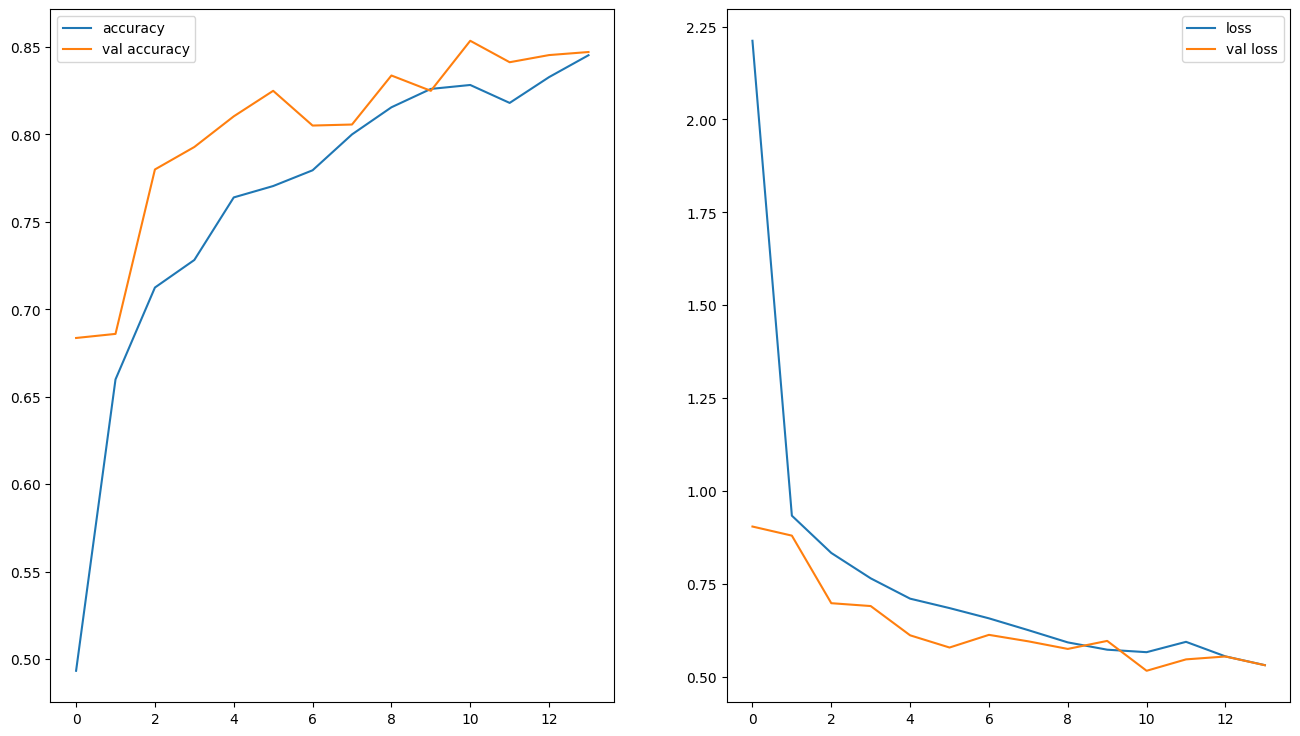

In [ ]:
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(loc='best')
plt.show()

## Metrics Evaluation

In [ ]:
y_true = tf.concat(list(test_ds.map(lambda x, y: y)), axis=0)
y_pred = tf.argmax(model.predict(test_ds), axis=-1)
print(f"accuracy: {accuracy_score(y_true, y_pred)}")
print(f"recall: {recall_score(y_true, y_pred, average='macro')}")
print(f"precision: {precision_score(y_true, y_pred, average='macro')}")
print(f"f1: {f1_score(y_true, y_pred, average='macro')}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
accuracy: 0.8054919908466819
recall: 0.7923148148148148
precision: 0.7983044707311493
f1: 0.7910831868987344


# Try With YOLO

## Modify Folder

In [9]:
import os
import shutil
import random
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/jasonevan/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
root_dir = "./../data/brain-tumor-mri-dataset/Training"
classes = ["glioma", "meningioma", "notumor", "pituitary"]

# path tujuan
out_dir = "./../data/brain-tumor-mri-dataset-yolo"
splits = ["train", "val"]
ratios = [0.7, 0.3]  # 70% train, 30% val

# buat folder tujuan
for split in splits:
    for cls in classes:
        dir_path = os.path.join(out_dir, split, cls)
        os.makedirs(dir_path, exist_ok=True)

# proses tiap kelas
for cls in classes:
    files = os.listdir(os.path.join(root_dir, cls))
    random.shuffle(files)

    n_total = len(files)
    n_train = int(ratios[0] * n_total)
    n_val   = int(ratios[1] * n_total)

    train_files = files[:n_train]
    val_files   = files[n_train:n_train+n_val]

    for f in train_files:
        shutil.copy(
            os.path.join(root_dir, cls, f),
            os.path.join(out_dir, "train", cls, f)
        )
    for f in val_files:
        shutil.copy(
            os.path.join(root_dir, cls, f),
            os.path.join(out_dir, "val", cls, f)
        )

In [ ]:
root_dir = "./../data/brain-tumor-mri-dataset/Testing"
classes = ["glioma", "meningioma", "notumor", "pituitary"]

# path tujuan
out_dir = "./../data/brain-tumor-mri-dataset-yolo"
splits = ["test"]

# buat folder tujuan
for split in splits:
    for cls in classes:
        dir_path = os.path.join(out_dir, split, cls)
        os.makedirs(dir_path, exist_ok=True)

# proses tiap kelas
for cls in classes:
    files = os.listdir(os.path.join(root_dir, cls))
    random.shuffle(files)

    for f in files:
        shutil.copy(
            os.path.join(root_dir, cls, f),
            os.path.join(out_dir, "test", cls, f)
        )

## Modeling

In [ ]:
yolo_model = YOLO("yolov8n-cls.pt")

results = yolo_model.train(
    data="./../data/brain-tumor-mri-dataset-yolo",
    epochs=20,
    imgsz=256,
    batch=32,
    augment=True
)

Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain-tumor-mri-dataset-yolo, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

## Evaluation

In [ ]:
results = yolo_model.val(data="./../data/brain-tumor-mri-dataset-yolo", split="test")

print(results)

Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,440,004 parameters, 0 gradients, 3.3 GFLOPs
train: /content/brain-tumor-mri-dataset-yolo/train... found 3996 images in 4 classes ✅ 
val: /content/brain-tumor-mri-dataset-yolo/val... found 1712 images in 4 classes ✅ 
test: /content/brain-tumor-mri-dataset-yolo/test... found 1311 images in 4 classes ✅ 
test: Fast image access ✅ (ping: 0.0±0.0 ms, read: 404.2±293.2 MB/s, size: 21.1 KB)
test: Scanning /content/brain-tumor-mri-dataset-yolo/test... 1311 images, 0 corrupt: 100% ━━━━━━━━━━━━ 1311/1311 3.9Kit/s 0.3s
test: New cache created: /content/brain-tumor-mri-dataset-yolo/test.cache
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 82/82 10.5it/s 7.8s
                   all      0.983          1
Speed: 0.2ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/runs/classify/val
ultralytics.utils.metrics.Classif

Output di sini mungkin berbeda dengan path aslinya, karena output tersebut dijalankan di colab menggunakan server colab, sementara datanya disesuaikan dengan path yang ada di lokal.

In [ ]:
yolo_model = YOLO("best.pt")
image_paths = []
class_names = sorted(os.listdir(TEST_PATH))

for class_name in class_names:
    class_dir = os.path.join(TEST_PATH, class_name)
    for fname in os.listdir(class_dir):
        image_paths.append(os.path.join(class_dir, fname))


results = yolo_model.predict(image_paths, save=False)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 256x256 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 0.3ms
1: 256x256 glioma 1.00, pituitary 0.00, meningioma 0.00, notumor 0.00, 0.3ms
2: 256x256 glioma 1.00, pituitary 0.00, meningioma 0.00, notumor 0.00, 0.3ms
3: 256x256 glioma 1.00, meningioma 0.00, notumor 0.00, pituitary 0.00, 0.3ms
4: 256x256 glioma 1.00, pituitary 0.00, meningioma 0.00, notumor 0.00, 0.3ms
5: 256x256 glioma 1.00, meningioma 0.00, pituitary 0.00, notumor 0.00, 

In [ ]:
y_pred = np.array([r.probs.top1 for r in results])
y_true = []
for class_idx, class_name in enumerate(class_names):
    folder = os.path.join(TEST_PATH, class_name)
    y_true.extend([class_idx] * len(os.listdir(folder)))

y_true = np.array(y_true)

In [ ]:
print(f"accuracy: {accuracy_score(y_true, y_pred)}")
print(f"recall: {recall_score(y_true, y_pred, average='macro')}")
print(f"precision: {precision_score(y_true, y_pred, average='macro')}")
print(f"f1: {f1_score(y_true, y_pred, average='macro')}")

accuracy: 0.9832189168573608
recall: 0.9818300653594771
precision: 0.9831754247730911
f1: 0.9824713733561898
